In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from keras.datasets import cifar10

In [ ]:
(xtrain,ytrain),(xtest,ytest) = cifar10.load_data()

170498071/170498071 [==============================] - 5s 0us/step


In [ ]:
type(xtrain)

numpy.ndarray

In [ ]:
xtrain.shape

(50000, 32, 32, 3)

array([[[53, 65, 53],
        [54, 63, 52],
        [56, 60, 50],
        ...,
        [47, 51, 50],
        [41, 45, 44],
        [24, 28, 27]],

       [[46, 59, 41],
        [53, 62, 45],
        [54, 59, 44],
        ...,
        [42, 46, 45],
        [39, 43, 42],
        [28, 32, 31]],

       [[45, 59, 38],
        [50, 60, 41],
        [46, 52, 34],
        ...,
        [38, 42, 41],
        [36, 40, 39],
        [29, 33, 32]],

       ...,

       [[71, 83, 66],
        [74, 83, 66],
        [80, 85, 67],
        ...,
        [51, 54, 33],
        [46, 49, 34],
        [49, 50, 41]],

       [[75, 82, 67],
        [79, 85, 69],
        [81, 85, 67],
        ...,
        [61, 65, 41],
        [64, 67, 48],
        [48, 50, 41]],

       [[85, 83, 71],
        [85, 84, 71],
        [86, 86, 70],
        ...,
        [61, 65, 39],
        [64, 67, 46],
        [49, 50, 41]]], dtype=uint8)
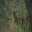

In [ ]:
xtrain[10]

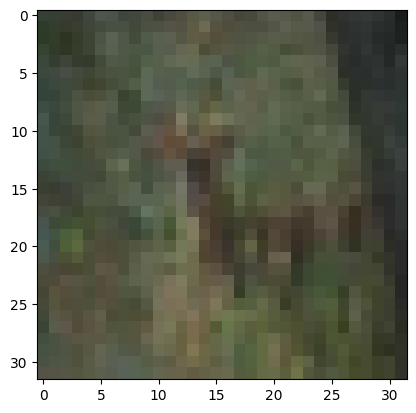

In [ ]:
img = plt.imshow(xtrain[10])

In [ ]:
lab1 = ytrain[10]
print(lab1)

[4]


In [ ]:
classification = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
print("Image class is : ",classification[ytrain[10][0]])

Image class is :  deer


In [ ]:
ytrain_one_hot = to_categorical(ytrain)
ytest_one_hot = to_categorical(ytest)

In [ ]:
ytrain_one_hot[10]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
print("One hot label : ", ytrain_one_hot[10])

One hot label :  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [ ]:
xtrain = xtrain/255
xtest = xtest/255

In [ ]:
xtrain[10]

array([[[0.20784314, 0.25490196, 0.20784314],
        [0.21176471, 0.24705882, 0.20392157],
        [0.21960784, 0.23529412, 0.19607843],
        ...,
        [0.18431373, 0.2       , 0.19607843],
        [0.16078431, 0.17647059, 0.17254902],
        [0.09411765, 0.10980392, 0.10588235]],

       [[0.18039216, 0.23137255, 0.16078431],
        [0.20784314, 0.24313725, 0.17647059],
        [0.21176471, 0.23137255, 0.17254902],
        ...,
        [0.16470588, 0.18039216, 0.17647059],
        [0.15294118, 0.16862745, 0.16470588],
        [0.10980392, 0.1254902 , 0.12156863]],

       [[0.17647059, 0.23137255, 0.14901961],
        [0.19607843, 0.23529412, 0.16078431],
        [0.18039216, 0.20392157, 0.13333333],
        ...,
        [0.14901961, 0.16470588, 0.16078431],
        [0.14117647, 0.15686275, 0.15294118],
        [0.11372549, 0.12941176, 0.1254902 ]],

       ...,

       [[0.27843137, 0.3254902 , 0.25882353],
        [0.29019608, 0.3254902 , 0.25882353],
        [0.31372549, 0

In [ ]:
#Create the architecture
model=Sequential()
#first conv layer
model.add(Conv2D(32,(5,5),activation='relu',input_shape=(32,32,3)))
#Pooling Layer
model.add(MaxPool2D(pool_size=(2,2)))
#second conv
model.add(Conv2D(32,(5,5),activation='relu'))
#Pooling Layer two
model.add(MaxPool2D(pool_size=(2,2)))

#flattening layer
model.add(Flatten())

#add a layer
model.add(Dense(1000,activation='relu'))
#add Dropout layer
model.add(Dropout(0.5))

#add a layer
model.add(Dense(500,activation='relu'))

#add a layer
model.add(Dense(10,activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
tr=model.fit(xtrain, ytrain_one_hot, batch_size=256, epochs=20, validation_split=0.2)

Epoch 1/20
157/157 [==============================] - 67s 399ms/step - loss: 1.7054 - accuracy: 0.3752 - val_loss: 1.3982 - val_accuracy: 0.4980
Epoch 2/20
157/157 [==============================] - 62s 397ms/step - loss: 1.3503 - accuracy: 0.5082 - val_loss: 1.2949 - val_accuracy: 0.5369
Epoch 3/20
157/157 [==============================] - 60s 381ms/step - loss: 1.2083 - accuracy: 0.5680 - val_loss: 1.2348 - val_accuracy: 0.5691
Epoch 4/20
157/157 [==============================] - 64s 407ms/step - loss: 1.1108 - accuracy: 0.6033 - val_loss: 1.0677 - val_accuracy: 0.6228
Epoch 5/20
157/157 [==============================] - 59s 376ms/step - loss: 1.0085 - accuracy: 0.6427 - val_loss: 1.0261 - val_accuracy: 0.6357
Epoch 6/20
157/157 [==============================] - 61s 385ms/step - loss: 0.9336 - accuracy: 0.6691 - val_loss: 0.9880 - val_accuracy: 0.6472
Epoch 7/20
157/157 [==============================] - 61s 391ms/step - loss: 0.8668 - accuracy: 0.6934 - val_loss: 0.9912 - val_ac

In [ ]:
img1 = plt.imread("images.jpg")

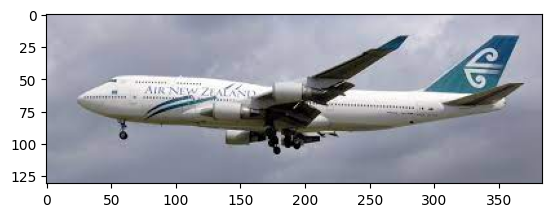

In [ ]:
img = plt.imshow(img1)

In [ ]:
from skimage import transform

In [ ]:
resize = transform.resize(img1,(32,32,3))

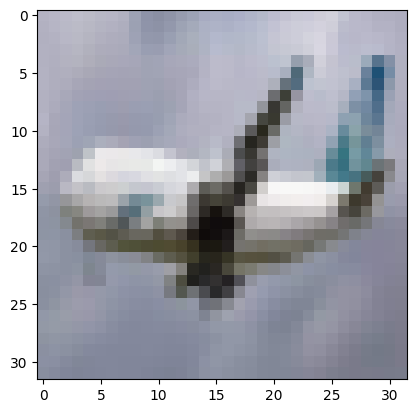

In [ ]:
img = plt.imshow(resize)

In [ ]:
prediction = model.predict(np.array([resize]))
print(prediction)

1/1 [==============================] - 0s 44ms/step
[[9.99804676e-01 1.46332859e-11 1.22871730e-04 1.28737385e-08
  7.22912810e-05 1.45310874e-09 3.29049510e-10 4.78569984e-09
  1.60010202e-07 8.21125123e-09]]


In [ ]:
list_index = [0,1,2,3,4,5,6,7,8,9]
x = prediction
for i in range(10):
  for j in range(10):
    if x[0][list_index[i]]>x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp

print(list_index)

[0, 2, 4, 8, 3, 9, 7, 5, 6, 1]


In [ ]:
for i in range(5):
    print(classification[list_index[i]])

airplane
bird
deer
ship
cat
